In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
book = pd.read_csv('clean_books.csv')
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


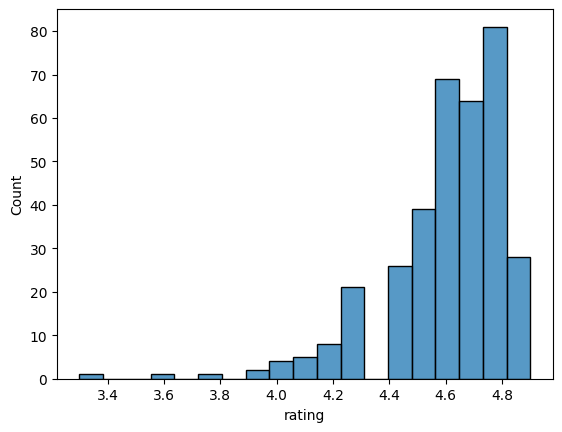

In [13]:
%matplotlib inline
books = pd.read_csv('clean_books.csv')
sns.histplot(data=books, x='rating')
plt.show()

In [14]:
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

In [15]:
books['genre'].value_counts()

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

In [16]:
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

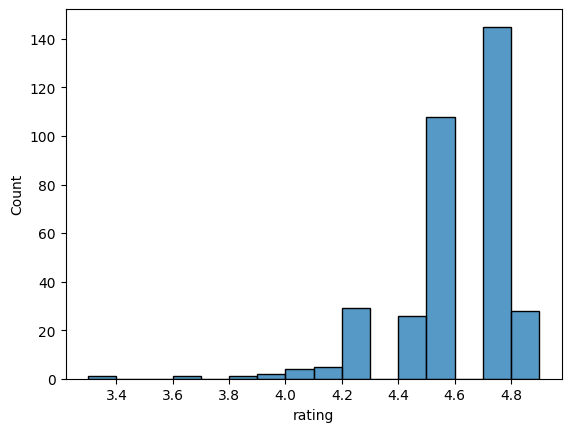

In [17]:
sns.histplot(data=books, x='rating', binwidth = 0.1)
plt.show()

In [18]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [19]:
books["genre"].isin(["Fiction","Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [20]:
~books['genre'].isin(['Fiction','Non Ffiction'])

0       True
1      False
2       True
3      False
4       True
       ...  
345     True
346    False
347     True
348    False
349     True
Name: genre, Length: 350, dtype: bool

In [21]:
books[books["genre"].isin(["Fiction","Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


In [22]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [23]:
print(books["year"].max())
print("--------------")
print(books["year"].min())


2019
--------------
2009


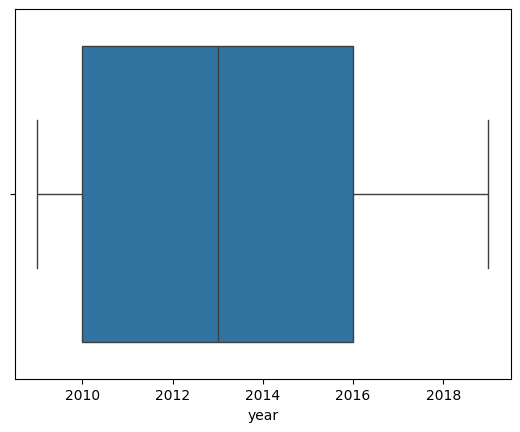

In [24]:
sns.boxplot(data=books, x="year")
plt.show()

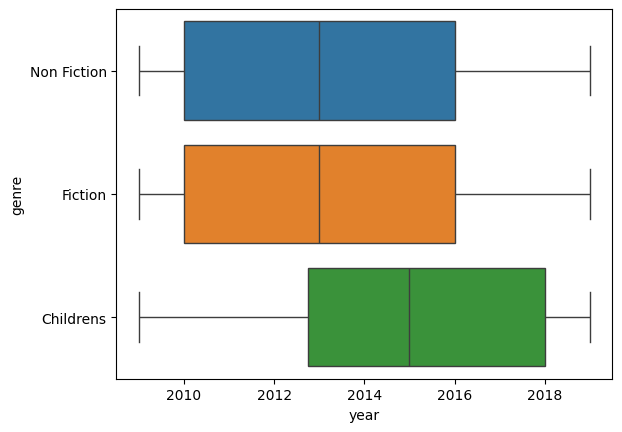

In [25]:
sns.boxplot(data=books, x="year", y="genre", hue="genre")
plt.show()

In [26]:
unemployment = pd.read_csv('clean_unemployment.csv')
unemployment.value_counts('continent')

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64

In [27]:
not_oceania = unemployment[unemployment["continent"] != "Oceania" ]
not_oceania.value_counts('continent')

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Name: count, dtype: int64

In [28]:
unemployment[ ~unemployment['continent'].isin(['Oceania']) ]

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,VNM,Vietnam,Asia,1.11,1.00,1.03,1.32,1.26,1.85,1.85,1.87,1.16,2.04,2.39,2.17
178,YEM,"Yemen, Rep.",Asia,12.83,13.23,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
179,ZAF,South Africa,Africa,24.68,24.64,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
180,ZMB,Zambia,Africa,13.19,10.55,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


In [29]:
print(unemployment['2021'].min(), unemployment['2021'].max())

0.26 33.56


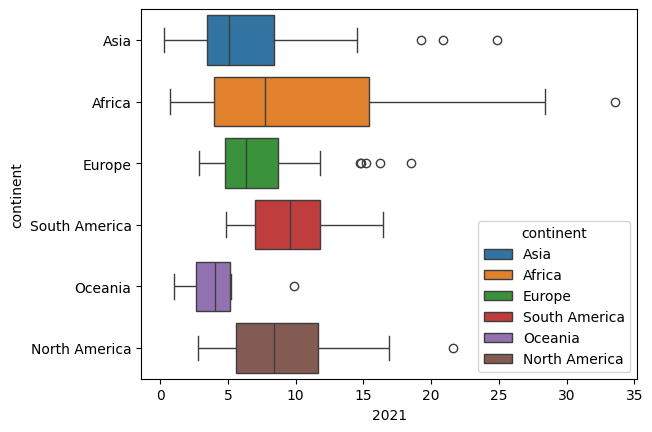

In [30]:
sns.boxplot(data=unemployment, x='2021', y='continent', hue='continent')
plt.show()

In [31]:
books[['rating', 'year']].agg(['std','mean',])

,rating,year
std,0.226941,3.284711
mean,4.608571,2013.508571


In [32]:
books.agg({"rating":["mean","std"],"year":["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [33]:
books.groupby("genre").agg( 
    mean_rating=("rating","mean"),
    std_rating=("rating","std"),
    median_year=("year","median") )

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


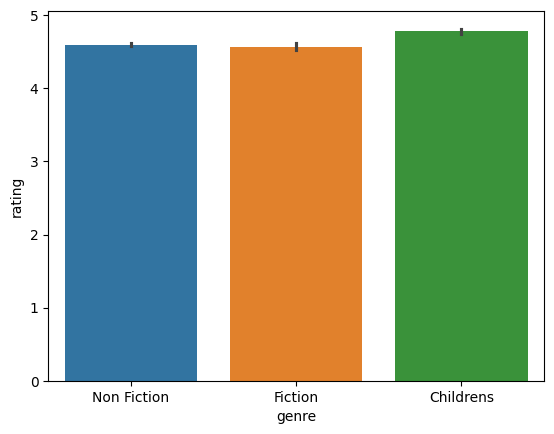

In [34]:
sns.barplot(data=books, x="genre", y="rating", hue="genre" )
plt.show()

In [35]:
numeric_cols = list(unemployment.select_dtypes("number").columns)
unemployment[numeric_cols].agg(["mean", "std"])

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192


In [36]:
unemployment.groupby('continent')[numeric_cols].agg(['mean', 'std'])

2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  9.264340  7.455293  10.307736   
Asia           5.277201  6.090213  5.409128  5.949149  5.254008   7.012340   
Europe         5.177845  7.427436  4.738206  6.764359  4.124734   7.470513   
North America  5.326446  7.281111  5.253180  7.095000  4.770490   9.297778   
Oceania        2.492834  3.851250  2.455893  3.773750  2.369068   4.273750   
South America  3.398994  7.496667  3.408856  7.719167  3.379845  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

In [37]:
continent_summary = unemployment.groupby("continent").agg(mean_rate_2021 = ('2021', 'mean'))
print(continent_summary)

               mean_rate_2021
continent                    
Africa              10.473585
Asia                 6.906170
Europe               7.414872
North America        9.155000
Oceania              4.280000
South America        9.924167


In [38]:
continent_summary = unemployment.groupby("continent").agg(mean_rate_2021 = ('2021', 'mean'),std_rate_2021 = ('2021', 'std'))
print(continent_summary) 

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


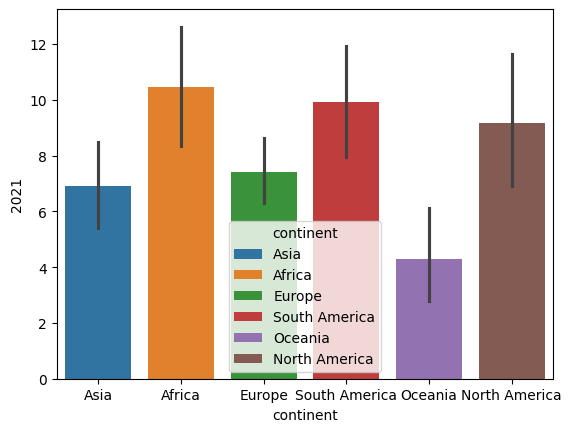

In [39]:
sns.barplot(data=unemployment, x='continent', y='2021', hue="continent" )
plt.show()

In [40]:
planes = pd.read_csv('Airlines_unclean.csv', index_col = 0)
planes.head()
print(planes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 999.4+ KB
None


In [41]:
print(planes.isna().sum())


Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [42]:
threshold = len(planes) * 0.05
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
planes.dropna(subset=cols_to_drop, inplace=True)
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


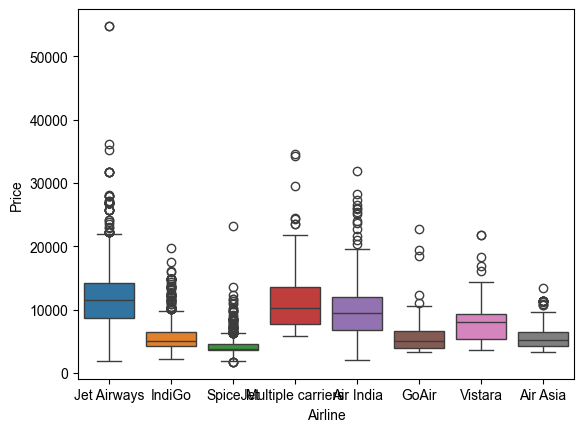

In [43]:
print(planes["Additional_Info"].value_counts())
sns.boxplot(data=planes, x='Airline', y='Price', hue='Airline')
sns.set(rc={"figure.figsize":(8, 6)})  #width=8,#height=6
plt.show() 

In [44]:
salaries = pd.read_csv('ds_salaries_clean.csv', index_col = 0)

print( salaries.select_dtypes("object").head() )

                             Designation Experience Employment_Status  \
Working_Year                                                            
2020                      Data Scientist        Mid                FT   
2020          Machine Learning Scientist     Senior                FT   
2020                   Big Data Engineer     Senior                FT   
2020                Product Data Analyst        Mid                FT   
2020           Machine Learning Engineer     Senior                FT   

             Employee_Location Company_Size  
Working_Year                                 
2020                        DE            L  
2020                        JP            S  
2020                        GB            M  
2020                        HN            S  
2020                        US            L  


In [45]:
print ( salaries["Designation"].nunique())

50


Index(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist'],
      dtype='object', name='Designation')


<Axes: xlabel='Designation'>

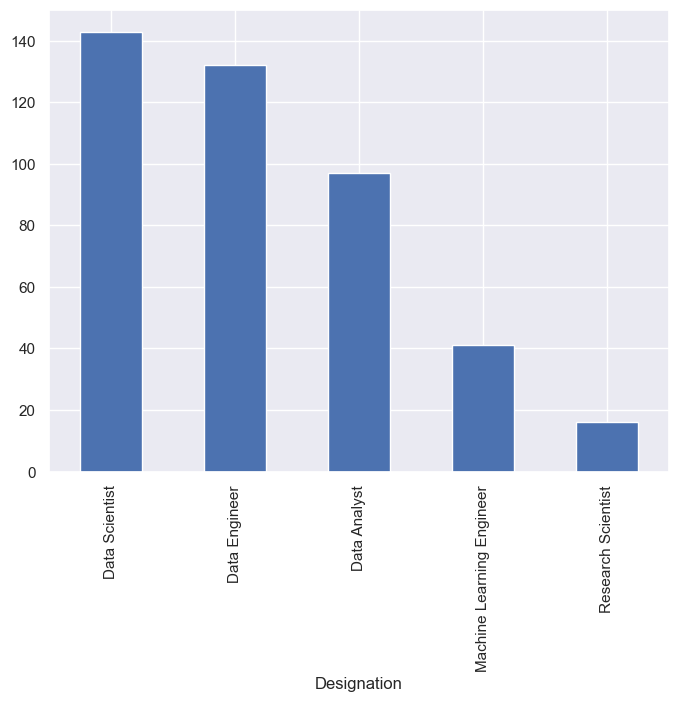

In [46]:
salaries_count = salaries['Designation'].value_counts().iloc[0:5]
print(salaries_count.index)
salaries_count.plot(kind='bar')

In [47]:
salaries["Designation"].str.contains("Scientist")

Working_Year
2020     True
2020     True
2020    False
2020    False
2020    False
        ...  
2022    False
2022    False
2022    False
2022    False
2022     True
Name: Designation, Length: 607, dtype: bool

In [48]:
salaries["Designation"].str.contains("Machine Learning|AI")

Working_Year
2020    False
2020     True
2020    False
2020    False
2020     True
        ...  
2022    False
2022    False
2022    False
2022    False
2022     True
Name: Designation, Length: 607, dtype: bool

In [49]:
job_categories = ['Data Science','Data Analytics',
                  'Data Engineering','Machine Learning',
                  'Managerial', 'Consultant']

In [50]:
data_science = 'Scientist|NLP'
data_analyst = 'Analyst|Analytics'
data_engineer = 'Data Engineer|ETL|Architect|Infrastructure'
ml_engineer = 'Machine Learning|ML|Big Data|AI'
manager = 'Manager|Head|Director|Lead|Principal|Staff'
consultant = 'Consultant|Freelance'

In [51]:
conditions = [
    (salaries['Designation'].str.contains(data_science)),
    (salaries['Designation'].str.contains(data_analyst)),
    (salaries['Designation'].str.contains(data_engineer)),
    (salaries['Designation'].str.contains(ml_engineer)),
    (salaries['Designation'].str.contains(manager)),
    (salaries['Designation'].str.contains(consultant)),
]

In [52]:
import numpy as np
 
salaries['Job_Category'] = np.select(conditions, job_categories , default="unknown" )

In [53]:
print( salaries[["Designation","Job_Category"]].head())

                             Designation      Job_Category
Working_Year                                              
2020                      Data Scientist      Data Science
2020          Machine Learning Scientist      Data Science
2020                   Big Data Engineer  Data Engineering
2020                Product Data Analyst    Data Analytics
2020           Machine Learning Engineer  Machine Learning


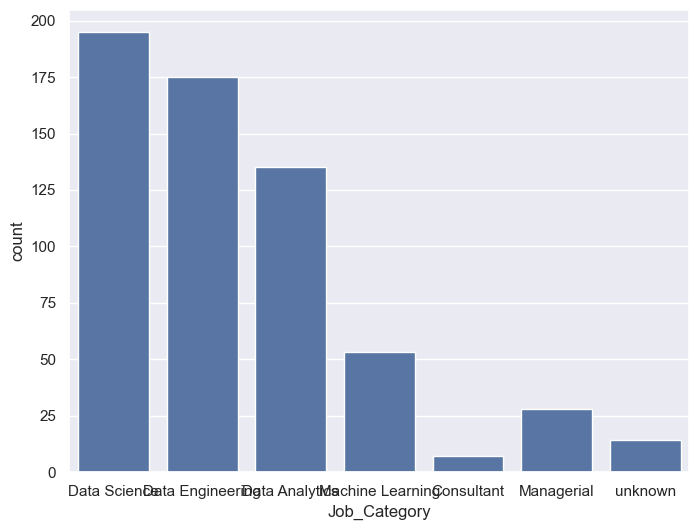

In [54]:
sns.countplot(data=salaries, x="Job_Category")
plt.show()

In [55]:
non_numeric = planes.select_dtypes("object")
for col in non_numeric.columns:
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  40
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  9


In [56]:
planes['Duration'].value_counts()

Duration
2h 50m     425
1h 30m     304
2h 45m     281
2h 35m     265
2h 55m     262
          ... 
19h 50m      1
30h 10m      1
40h 20m      1
31h 55m      1
47h 40m      1
Name: count, Length: 362, dtype: int64

In [57]:
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

<div style="background-color: #AAFF00; padding: 15px; border-radius: 10px;">
<h2 style="margin-top:0;">Assignments</h2></div>


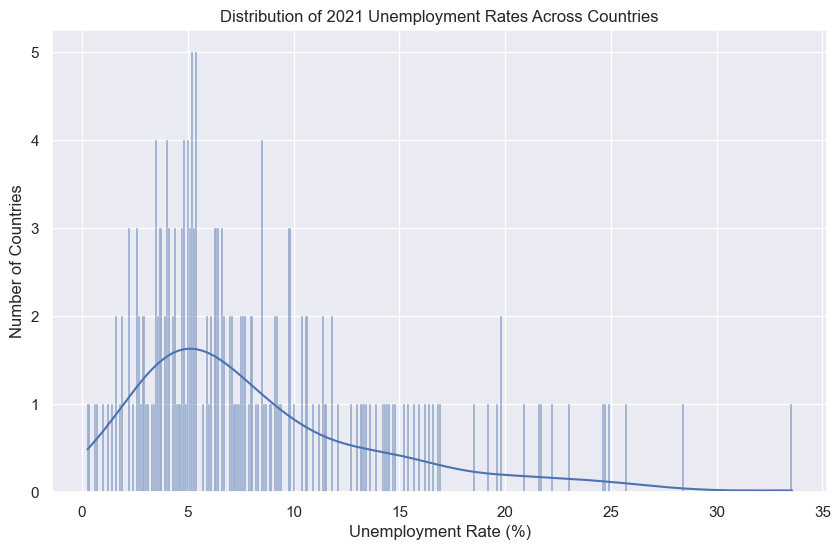

In [78]:
#Slide - 6

plt.figure(figsize=(10, 6))
sns.histplot(data=unemployment, x='2021', binwidth=0.1, kde=True)
plt.title('Distribution of 2021 Unemployment Rates Across Countries')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Number of Countries')
plt.show()

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

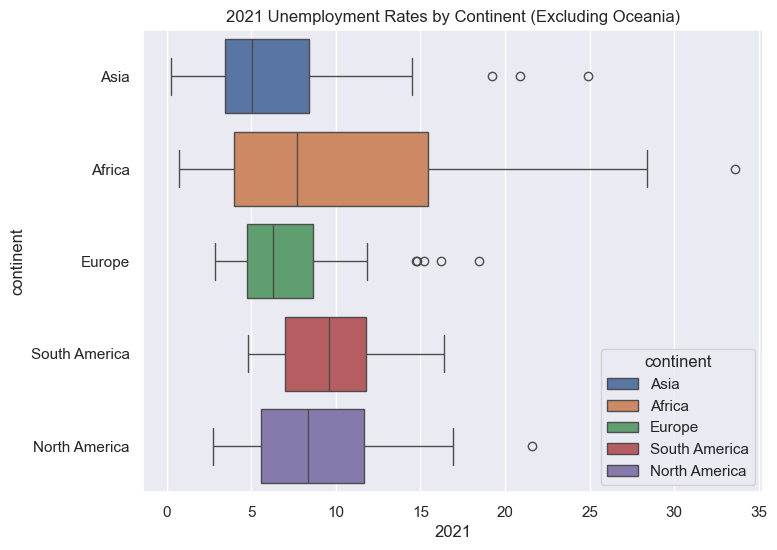

In [59]:
#Slide - 14

not_oceania = ~unemployment['continent'].isin(['Oceania'])
filtered_unemployment = unemployment[not_oceania]
print(filtered_unemployment)
print(unemployment['2021'].min(), unemployment['2021'].max())


sns.boxplot(data=filtered_unemployment, x='2021', y='continent', hue = 'continent')
plt.title('2021 Unemployment Rates by Continent (Excluding Oceania)')
plt.show()

In [60]:
#Slide - 19
numeric_cols = list(unemployment.select_dtypes("number").columns)
unemployment[numeric_cols].agg(["mean", "std"])

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192


In [61]:
#Slide - 19
unemployment.groupby('continent')[numeric_cols].agg(['mean', 'std'])

2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  9.264340  7.455293  10.307736   
Asia           5.277201  6.090213  5.409128  5.949149  5.254008   7.012340   
Europe         5.177845  7.427436  4.738206  6.764359  4.124734   7.470513   
North America  5.326446  7.281111  5.253180  7.095000  4.770490   9.297778   
Oceania        2.492834  3.851250  2.455893  3.773750  2.369068   4.273750   
South America  3.398994  7.496667  3.408856  7.719167  3.379845  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

In [62]:
#Slide - 20

continent_summary = unemployment.groupby("continent").agg(mean_rate_2021 = ('2021', 'mean'))
print(continent_summary)

               mean_rate_2021
continent                    
Africa              10.473585
Asia                 6.906170
Europe               7.414872
North America        9.155000
Oceania              4.280000
South America        9.924167


In [63]:
#Slide - 20
continent_summary = unemployment.groupby("continent").agg(mean_rate_2021 = ('2021', 'mean'),std_rate_2021 = ('2021', 'std'))
print(continent_summary) 

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


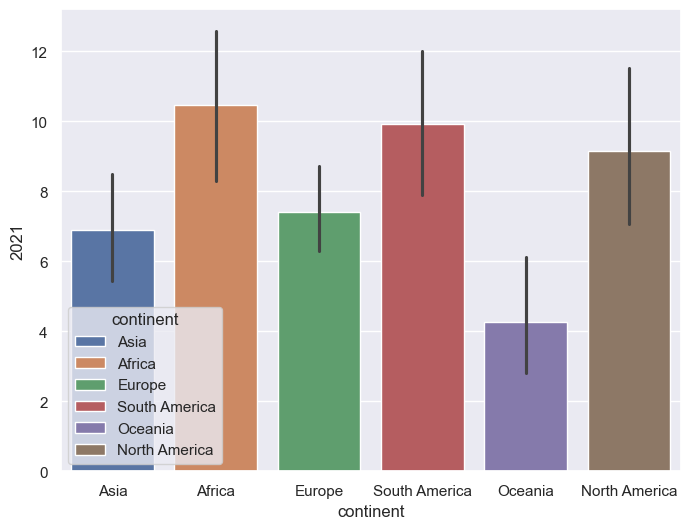

In [64]:
#Slide - 21
sns.barplot(data=unemployment, x='continent', y='2021', hue="continent" )
plt.show()

In [65]:
#Slide - 29
planes = pd.read_csv('Airlines_unclean.csv', index_col = 0)
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [66]:
#Slide - 29
threshold = len(planes) * 0.05
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
planes.dropna(subset=cols_to_drop, inplace=True)
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


In [67]:
#Slide - 32 
planes = planes.drop(columns = ['Additional_Info'])
prices_by_airline = planes.groupby('Airline')['Price'].median()
prices_dict = prices_by_airline.to_dict()
planes['Price'] = planes['Price'].fillna(planes['Airline'].map(prices_dict))
print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


In [68]:
#Slide - 38 

non_numeric = planes.select_dtypes('object')
for col in non_numeric.columns:
    print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  40
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


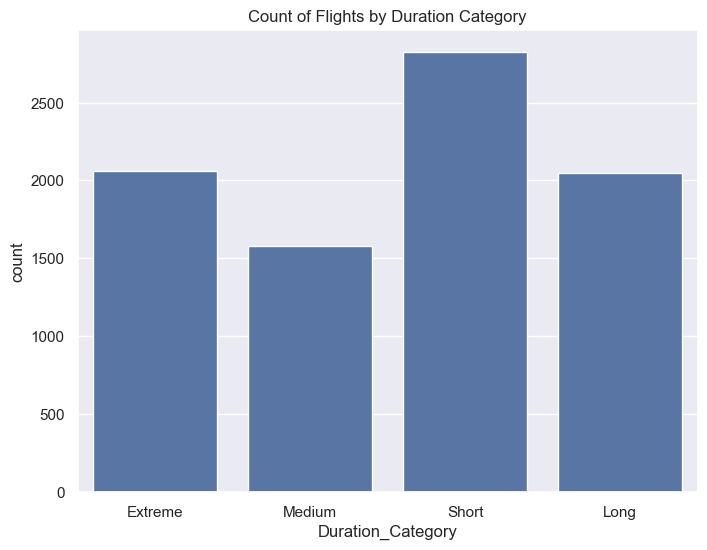

In [69]:
#Slide - 38 - 40

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def parse_duration(dur):
    if pd.isna(dur):
        return np.nan
    dur = dur.replace(' ', '')  
    hours = 0
    minutes = 0
    if 'h' in dur:
        parts = dur.split('h')
        hours = float(parts[0]) if parts[0] else 0
        if len(parts) > 1:
            minutes = float(parts[1].replace('m', '')) if 'm' in parts[1] else 0
    elif 'm' in dur:
        minutes = float(dur.replace('m', ''))
    return hours + minutes / 60

planes['numeric_duration'] = planes['Duration'].apply(parse_duration)

conditions = [
    (planes['numeric_duration'] <= 4),
    ((planes['numeric_duration'] > 4) & (planes['numeric_duration'] <= 9)),
    ((planes['numeric_duration'] > 9) & (planes['numeric_duration'] <= 16)),
    (planes['numeric_duration'] > 16)
]

flight_categories = ['Short', 'Medium', 'Long', 'Extreme']


planes['Duration_Category'] = np.select(conditions, flight_categories, default='Unknown')

sns.countplot(data=planes, x='Duration_Category')
plt.title('Count of Flights by Duration Category')
plt.show()

#Ai Generated

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


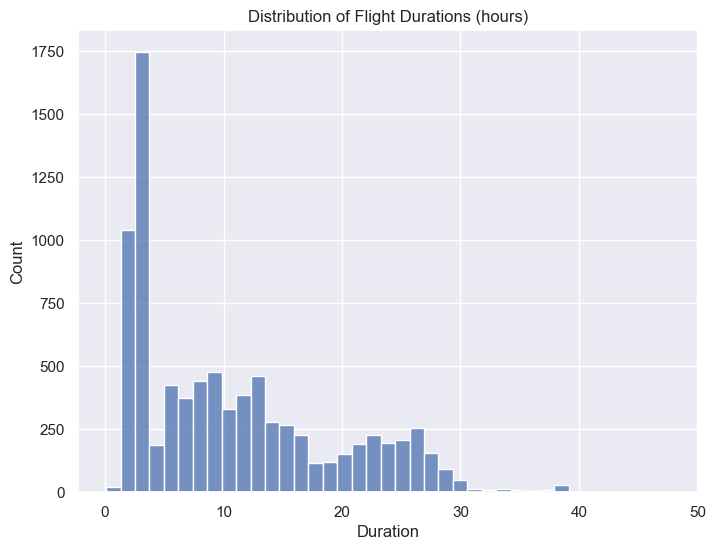

In [70]:
#Slide - 44.,45

print(planes['Duration'].head())

def clean_duration(dur):
    if pd.isna(dur):
        return np.nan
    if not isinstance(dur, str):  
        return float(dur)  
    dur = dur.replace(' ', '')
    if 'h' in dur and 'm' in dur:
        h, m = dur.split('h')
        m = m.replace('m', '')
        return float(h) + float(m)/60 if m else float(h)
    elif 'h' in dur:
        return float(dur.replace('h', ''))
    elif 'm' in dur:
        return float(dur.replace('m', ''))/60
    else:
        return np.nan

planes['Duration'] = planes['Duration'].apply(clean_duration)
planes['Duration'] = planes['Duration'].astype(float)


sns.histplot(data=planes, x='Duration')
plt.title('Distribution of Flight Durations (hours)')
plt.show()

In [71]:
#Slide - 45

planes['airline_price_stdev'] = planes.groupby('Airline')['Price'].transform('std')
planes['airline_median_duration'] = planes.groupby('Airline')['Duration'].transform('median')
planes['price_destination_mean'] = planes.groupby('Destination')['Price'].transform('mean')

print(planes[['Airline', 'Price', 'airline_price_stdev', 'Duration', 'airline_median_duration', 'Destination', 'price_destination_mean']].head())

       Airline    Price  airline_price_stdev   Duration  \
0  Jet Airways  13882.0          4159.846432  19.000000   
1       IndiGo   6218.0          2245.529140   5.416667   
2       IndiGo  13302.0          2245.529140   4.750000   
3     SpiceJet   3873.0          1798.900648   2.416667   
4  Jet Airways  11087.0          4159.846432  15.500000   

   airline_median_duration Destination  price_destination_mean  
0                13.333333      Cochin            10473.585927  
1                 2.916667    Banglore             9093.622872  
2                 2.916667   New Delhi            11579.306944  
3                 2.500000    Banglore             9093.622872  
4                13.333333   New Delhi            11579.306944  


In [72]:
#Slide - 50

planes['airline_price_stdev'] = planes.groupby('Airline')['Price'].transform('std')
planes['airline_median_duration'] = planes.groupby('Airline')['Duration'].transform('median')
planes['price_destination_mean'] = planes.groupby('Destination')['Price'].transform('mean')

price_seventy_fifth = planes['Price'].quantile(0.75)
price_twenty_fifth = planes['Price'].quantile(0.25)

prices_iqr = price_seventy_fifth - price_twenty_fifth

upper = price_seventy_fifth + 1.5 * prices_iqr
lower = price_twenty_fifth - 1.5 * prices_iqr

planes = planes[(planes['Price'] >= lower) & (planes['Price'] <= upper)]

I just want to say in behalf of possibly 70% of the class, I was wondering if you could explain the lines of code because i sturggle to understand what code execute/do what 🥲🫡

I am certain that explaining from you is better than reading the slides. Most students learn better with proper explanation and teaching from the professors rather than reading slides. My friend from the other professor has an easier time learning while i struggle to make sense of some functions.